# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [18]:
what_we_are_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inferences)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inferences)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [19]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks # https://pytorch.org/docs/stable/nn.html

import matplotlib.pyplot as plt

In [20]:
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We will use a linear regression formula to make a straight line with *known* **parameters**.

In [21]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create a range of numbers
start = 0
end  = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + weight * X # y = a + b*x

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [22]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important conceptsw in machine learning in general)

Let's create a training and test set with our data.

In [23]:
# Create a train/test split
train_split = int(0.8 * len(X))
#train_split # 40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [24]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize!"

In [25]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data, test data and compares predictions.
  """
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot  test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

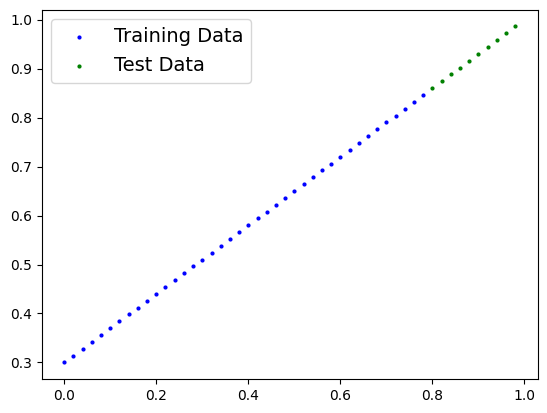

In [26]:
plot_predictions();

## 2. Build model

Our first PyTorch model

This is very exciting... let's do it

# [Learn from Python OOP](https://realpython.com/python3-object-oriented-programming/)


What are model does:
* Start with random values (wights and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias values used to create the data)

How does it do so?
Throught two main algorithms
1. Gradient descent : https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [27]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # -> https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

# PyTorch model buidling essential

* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`, this method defines what happens in the forward computation

# [PyTorch CheatSheet](https://pytorch.org/tutorials/beginner/ptcheat.html)

### Check the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [28]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# model_0
# model_0.parameters()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [29]:
# List named parameters
model_0.state_dict() # return dictionary of the parameters of our model (LinearRegressionModel)

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1236], dtype=torch.float64))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how it well ut predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [30]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [31]:
# with our using `inference_mode()` method
y_preds = model_0(X_test)
y_preds

tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [32]:
# Make predictions with model

'''
## You can also do something similar with `torch.no_grad(), however `torch.inference_mode()` if preferred.

with torch.no_grad():
  y_preds = model_0(X_test)

y_preds
'''

with torch.inference_mode(): # `torch.inference_mode()` disable to calculate or track `grad`
  y_preds = model_0(X_test)

y_preds


tensor([[0.3929],
        [0.3997],
        [0.4064],
        [0.4131],
        [0.4199],
        [0.4266],
        [0.4333],
        [0.4401],
        [0.4468],
        [0.4535]], dtype=torch.float64)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [33]:
# let's look at the `y_test`
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

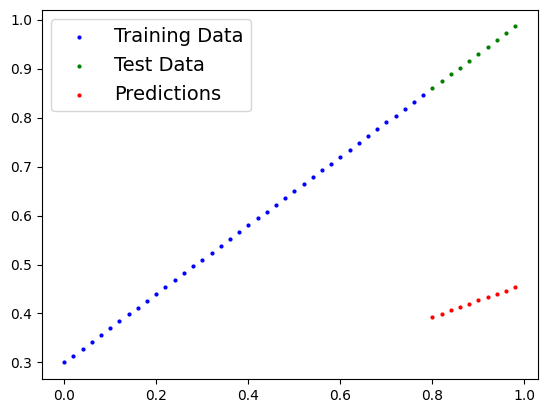

In [34]:
# visualize
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these maybe random) to some *known* parameters.

Or in other words, from a poor representation of the data to a better representation of the data.


One way to measure how poor or how wrong your models predictions are is to use a [**loss functions**](https://pytorch.org/docs/stable/nn.html#loss-functions)

* Note: Loss function maybe also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.


Things we need to train::

* [**Loss Function:**](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss) A function to measure how wrong your model predictions are to the ideal outputs, lower is better.

* [**Optimizer:**](https://pytorch.org/docs/stable/optim.html) Takes into account the loss of a model and adjusts the model's parameter's (e.g. weight and bias in our case) to improve the `loss function`.
  * `params`: the model parameters you'd like to optimize of example `params=model_0.parameters()`
  * `lr` (learning rate): the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [37]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [41]:
# Check out our model's parameters (a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1236], dtype=torch.float64))])

#### Extra Curriculum
**Reading** the documentation:
* https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
* https://pytorch.org/docs/stable/optim.html

* Note:
  * the small of the learning rate (lr), the small of the change in parameter
  * the larger of the learning rate (lr), the larger of the change in parameter

In [40]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent) #https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01) # lr = learning rate = possibly the most important hyperparameter you can set


**Q:** Which loss function and optimizer should i use?

**A:** This will problem specific. But with experience, you will get an idea of what works and what doesn't with yoour particular problem set.

For examle, for a Regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make some predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [43]:
list(model_0.parameters()) # in the model we build future, likely be set automatically rather than you setting them explicitly, like we've done when you create `model_0`

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1236], dtype=torch.float64, requires_grad=True)]

In [39]:
# An epoch is one loop through the data... (this is a hyper parameter because we've set it ourselves )
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requires graidents to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calulcate the loos
  loss = loss_fn(y_pred, y_train) # torch.L1Loss(input, target)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Performn backpropagation on the loss wioth respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizert (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so... we have to zero them in step 3 for the next iteration of the loop



  model_0.eval() # turns off graident tracking


L1Loss()